In [ ]:
#conda activate scan_cox_its

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path
import matplotlib.colors as mcolors
import numpy as np

In [2]:
proj_dir="/master/nplatt/sch_hae_scan"
results_dir="{}/results".format(proj_dir)

os.chdir(results_dir)

In [3]:
info_df=pd.read_csv("{}/data/seq_and_sample_docs/all_sh_sb_sample_data.csv".format(proj_dir), sep=",") 

In [4]:
Path("{}/cox_its".format(results_dir)).mkdir(parents=True, exist_ok=True)
os.chdir("{}/cox_its".format(results_dir))

In [5]:
pca_df=pd.read_csv("{}/results/pca/pca_df.csv".format(proj_dir), sep=",")

samples = pca_df.loc[pca_df["pca_species"].isin(["s_bovis", "s_haematobium", "s_margrebowiei"]), "sample_name"]
np.savetxt("samples.list", samples, fmt="%s")

# ITS

In [ ]:
FJ588857.1 vs GCF_000699445.3

ITS location based on blast results

NC_067196.1:21293218-21294122

## Get ITS SNVs

In [ ]:
%%bash 

# --vcf ../post_phase_filtering/autosomes_unrelated.vcf \

    
conda run -n scan_cox_its --cwd . --live-stream \
    vcftools \
        --vcf ../filter_genotypes/sorted_annotated_snps.vcf \
        --chr NC_067196.1 \
        --from-bp 21293218 \
        --to-bp 21294122 \
        --keep samples.list \
        --recode \
        --recode-INFO-all \
        --stdout \
        >its.vcf

In [1]:
#generate consensus sequence
samtools faidx ../../data/GCF_000699445.3_UoM_Shae.V3_genomic.fna  NC_067196.1 >NC_067196.1.fas

samtools faidx NC_067196.1.fas
../../bin/gatk-4.2.0.0/gatk CreateSequenceDictionary R=NC_067196.1.fas O=NC_067196.1.dict

In [1]:
bcftools query -l its.vcf >samples.list

In [1]:
for SAMPLE in $(cat samples.list); do
    vcftools \
        --vcf its.vcf \
        --indv ${SAMPLE} \
        --recode \
        --recode-INFO-all \
        --stdout \
        >${SAMPLE}_its.vcf
   
    ../../bin/gatk-4.2.0.0/gatk IndexFeatureFile \
        --input ${SAMPLE}_its.vcf
    
    ../../bin/gatk-4.2.0.0/gatk FastaAlternateReferenceMaker \
        --output ${SAMPLE}_chr.fas \
        --reference NC_067196.1.fas \
        --variant ${SAMPLE}_its.vcf \
        --use-iupac-sample ${SAMPLE}
    
    sed -i "s/>1 />$SAMPLE-/" ${SAMPLE}_chr.fas
    sed -i "s/:1-93306550//" ${SAMPLE}_chr.fas
    
    samtools faidx ${SAMPLE}_chr.fas
    samtools faidx ${SAMPLE}_chr.fas ${SAMPLE}-NC_067196.1:21293218-21294122 >${SAMPLE}_its.fas
    
done

In [ ]:
for SAMPLE in $(cat samples.list); do
    samtools faidx 

In [ ]:
#now replace the names on the fasta header

## Phylogeny (ITS)

In [11]:
%%bash 

conda run -n scan_cox_its --cwd . --live-stream \
    vcftools \
        --vcf ../twisst/twisst.vcf \
        --chr NC_067196.1 \
        --from-bp 21243218 \
        --to-bp 21344122 \
        --keep samples.list \
        --recode \
        --recode-INFO-all \
        --stdout \
        >its_inf_expanded.vcf

~/sch_hae_scan/bin/vcf2phylip/vcf2phylip.py -i its_inf_expanded.vcf


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf ../twisst/twisst.vcf
	--chr NC_067196.1
	--to-bp 21344122
	--keep samples.list
	--recode-INFO-all
	--recode
	--from-bp 21243218
	--stdout

Keeping individuals in 'keep' list
After filtering, kept 163 out of 163 Individuals
Outputting VCF file...
After filtering, kept 1487 out of a possible 25596497 Sites
Run Time = 50.00 seconds



Converting file 'its_inf_expanded.vcf':

Number of samples in VCF: 163
Total of genotypes processed: 1487
Genotypes excluded because they exceeded the amount of missing data allowed: 0
Genotypes that passed missing data filter but were excluded for being MNPs: 0
SNPs that passed the filters: 1487

Sample 1 of 163, 'Sb_NG_au_1.2', added to the nucleotide matrix(ces).
Sample 2 of 163, 'Sb_NG_au_2.10', added to the nucleotide matrix(ces).
Sample 3 of 163, 'Sb_NG_au_2.13', added to the nucleotide matrix(ces).
Sample 4 of 163, 'Sb_NG_au_2.5', added to the nucleotide matrix(ces).
Sample 5 of 163, 'Sb_NG_au_2.6', added to the nucleotide matrix(ces).
Sample 6 of 163, 'Sb_NG_be_1.10', added to the nucleotide matrix(ces).
Sample 7 of 163, 'Sb_NG_be_1.3', added to the nucleotide matrix(ces).
Sample 8 of 163, 'Sb_NG_be_1.5', added to the nucleotide matrix(ces).
Sample 9 of 163, 'Sb_NG_en_1.1', added to the nucleotide matrix(ces).
Sample 10 of 163, 'Sh_NG_eb_6_2', added to the nucleotide matrix(ce

In [12]:
%%bash

conda run -n scan_cox_its --cwd . --live-stream \
    vcftools \
        --vcf its_inf_expanded.vcf \
        --chr NC_067196.1 \
        --from-bp 21293218 \
        --to-bp 21294122 \
        --keep samples.list \
        --recode \
        --recode-INFO-all \
        --stdout \
        >its_inf.vcf

~/sch_hae_scan/bin/vcf2phylip/vcf2phylip.py -i its_inf.vcf


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf its_inf_expanded.vcf
	--chr NC_067196.1
	--to-bp 21294122
	--keep samples.list
	--recode-INFO-all
	--recode
	--from-bp 21293218
	--stdout

Keeping individuals in 'keep' list
After filtering, kept 163 out of 163 Individuals
Outputting VCF file...
After filtering, kept 47 out of a possible 1487 Sites
Run Time = 0.00 seconds



Converting file 'its_inf.vcf':

Number of samples in VCF: 163
Total of genotypes processed: 47
Genotypes excluded because they exceeded the amount of missing data allowed: 0
Genotypes that passed missing data filter but were excluded for being MNPs: 0
SNPs that passed the filters: 47

Sample 1 of 163, 'Sb_NG_au_1.2', added to the nucleotide matrix(ces).
Sample 2 of 163, 'Sb_NG_au_2.10', added to the nucleotide matrix(ces).
Sample 3 of 163, 'Sb_NG_au_2.13', added to the nucleotide matrix(ces).
Sample 4 of 163, 'Sb_NG_au_2.5', added to the nucleotide matrix(ces).
Sample 5 of 163, 'Sb_NG_au_2.6', added to the nucleotide matrix(ces).
Sample 6 of 163, 'Sb_NG_be_1.10', added to the nucleotide matrix(ces).
Sample 7 of 163, 'Sb_NG_be_1.3', added to the nucleotide matrix(ces).
Sample 8 of 163, 'Sb_NG_be_1.5', added to the nucleotide matrix(ces).
Sample 9 of 163, 'Sb_NG_en_1.1', added to the nucleotide matrix(ces).
Sample 10 of 163, 'Sh_NG_eb_6_2', added to the nucleotide matrix(ces).
Sample 11

In [ ]:
%%bash 

conda run -n scan_cox_its --cwd . --live-stream \
       raxml-ng \
            --all \
            --msa its_inf_expanded.min4.phy \
            --msa-format PHYLIP \
            --model GTR \
            --tree pars{100},rand{100} \
            --bs-trees 1000 \
            --threads 12 \
            --prefix its_inf_expanded \
            --outgroup margrebowiei_zambia_ERR310940

In [ ]:
%%bash 

conda run -n scan_cox_its --cwd . --live-stream \
       raxml-ng \
            --all \
            --msa its_inf.min4.phy \
            --msa-format PHYLIP \
            --model GTR \
            --tree pars{100},rand{100} \
            --bs-trees 1000 \
            --threads 12 \
            --prefix its_inf \
            --outgroup margrebowiei_zambia_ERR310940

In [13]:
nw_ed its_inf.raxml.support 'i & b<=10' o > its_inf.raxml.support_BS10.nwk

SyntaxError: invalid syntax (602521626.py, line 1)

In [ ]:
nw_ed its_inf_expanded.raxml.support 'i & b<=10' o > its_inf_expanded.raxml.support_BS10.nwk

In [ ]:
cat 

In [7]:
%%bash 

conda run -n scan_cox_its --cwd . --live-stream \
    vcftools \
        --vcf ../post_phase_filtering/autosomes_unrelated.vcf \
        --chr NC_067196.1 \
        --from-bp 21243218 \
        --to-bp 21344122 \
        --keep samples.list \
        --recode \
        --recode-INFO-all \
        --stdout \
        >its_expanded.vcf


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf ../post_phase_filtering/autosomes_unrelated.vcf
	--chr NC_067196.1
	--to-bp 21344122
	--keep samples.list
	--recode-INFO-all
	--recode
	--from-bp 21243218
	--stdout

Keeping individuals in 'keep' list
After filtering, kept 163 out of 166 Individuals
Outputting VCF file...
After filtering, kept 2134 out of a possible 28590241 Sites
Run Time = 55.00 seconds


In [ ]:
!~/sch_hae_scan/bin/vcf2phylip/vcf2phylip.py -i its_expanded.vcf -r -n -p

In [ ]:
conda run -n diploid_to_haploid_vcf --cwd . --live-stream \
    python ~/sch_hae_scan/code/diploid_to_haploid_vcf.py \
        "/master/nplatt/sch_hae_scan/results/cox_its/its_expanded.vcf" \
        its_expanded_coords.csv

In [ ]:
%%bash 

conda run -n scan_cox_its --cwd . --live-stream \
        raxml-ng \
            --all \
            --msa its_expanded.vcf.phylip \
            --msa-format PHYLIP \
            --model GTR \
            --tree pars{100} \
            --bs-trees 1000 \
            --threads 12 \
            --prefix its_expanded \
            --outgroup margrebowiei_zambia_ERR310940_h1,margrebowiei_zambia_ERR310940_h2

## ITS diagnostic sites

In [164]:
x=np.array([30, 682, 737, 787, 857])
x+21293218

array([21293248, 21293900, 21293955, 21294005, 21294075])

>GU257398.1 Schistosoma haematobium 18S ribosomal RNA gene, partial sequence; internal transcribed spacer 1, 5.8S ribosomal RNA gene, and internal transcribed spacer 2, complete sequence; and 28S ribosomal RNA gene, partial sequence
TTATCATAACCCAAAATATATAATGATGCATGCACCTGGCTTCTTGCTGGACTGTATGTACCCTGGCTTGGTGGTTATTACCCTAGGCTTCAGTGGTTGATATTTTCTTGACCGGGGTACCTAGCCTGTCGTATGCCCTGATGGTGTTCTCGTAACTTTCGGGTTGCCTGATCTGCCAAGGGCGATGGGACAGTGCATGACGCTATTGTTGTGTGCTAGGTTCAAAGAGAATTGTATGCTATATGCATGCAAATCCGCCCCGTTATTGTTCCTATTTCAAACTTTTACACTGTTGAAGCGATCCGGTTTGGCTTGCCATTCACGGGTTTGCTGCCTGGCATGCACCTGGCTTCGTGCTGGACTGCATGTACGCTGGCTTAGCGGTAAATATCCTAGGCTGCAGCGTTAACCATTAGTTCTATGCATTTGGGAAACCAATGTATGGGATTATTGGCGTACAACTTTGAGCGGTGGATCACTCGGCTCGTGTGTCGATGAAGAGTGCAGCCAACTGTGTGAATTAATGTGAACTGCATACTGCTTTGAACATCGACATCTTGAACGCATATTGCGGCTACGGGATATCCTGTGGCCACGCCTGTCCGAGGGTCGGCTTTTCATCTATCACGGCGCACATTGAGTCGTGGATTGGGCGAGTGCCTGCCGGCGTGTATACCCGCATATCAACGCGGGTTGCTGGTCGAAGGCTCCGTCCTAATAGTCCGGCCACAGCCTAGTCCGGTCTAGATGACTTGATCGAGATGCTGCGGTGGGTTGTGCTCGAGTCGTGGCTTAATGACATTATACGCGCTCGGGAAGAATCGCACCTATCGTACGCTACGTTGGTCACTTGATCTTGTCTCTATGGTTCGGTCTACGGTTTGTACCGATGGTGTGTGTAATACGCACGAATTGTATAATTGACCC
>MT580950.1 Schistosoma bovis voucher BK16.3_3BB13st.1 internal transcribed spacer 1, partial sequence; 5.8S ribosomal RNA gene, complete sequence; and internal transcribed spacer 2, partial sequence
TTATCATAACCCAAAATATATAATGATGCATGCACCTGGCTTCTTGCTGGGCTGTATGTACCCTGGCTTGGTGGTTATTACCCTAGGCTTCAGTGGTTGATATTTTCTTGACCGGGGTACCTAGCCTGTCGTATGCCCTGATGGTGTTCTCGTAACTTTCGGGTTGCCTGATCTGCCAAGGGCGATGGGACAGTGCATGACGCTATTGTTGTGTGCTAGGTTCAAAGAGAATTGTATGCTATATGCATGCAAATCCGCCCCGTTATTGTTCCTATTTCAAACTTTTACACTGTTGAAGCGATCCGGTTTGGCTTGCCATTCACGGGTTTGCTGCCTGGCATGCACCTGGCTTCGTGCTGGACTGCATGTACGCTGGCTTAGCGGTAAATATCCTAGGCTGCAGCGTTAACCATTAGTTCTATGCATTTGGGAAACCAATGTATGGGATTATTGGCGTACAACTTTGAGCGGTGGATCACTCGGCTCGTGTGTCGATGAAGAGTGCAGCCAACTGTGTGAATTAATGTGAACTGCATACTGCTTTGAACATCGACATCTTGAACGCATATTGCGGCTACGGGATATCCTGTGGCCACGCCTGTCCGAGGGTCGGCTTTTCATCTATCACGGCGCACATTGAGTCGTGGATTGGGCGAGTGCCTGCCGGCGTGTATACCCGCATATCAACGCGGGTTGCTGGTCAAAGGCTCCGTCCTAATAGTCCGGCCACAGCCTAGTCCGGTCTAGATGACTTGATTGAGATGCTGCGGTGGGTTGTGCTCGAGTCGTGGCTTAATGACATTATACACGCTCGGGAAGAATCGCACCTATCGTACGCTACGTTGGTCACTTGATCTTGTCTCTATGGTTCGGTCTATGGTTTGTACCGATGGTGTGTGTAATACGCACGAATTGTATAATTGACCC
>NC_067196.1:21293218-21294122 Schistosoma haematobium chromosome 1, whole genome shotgun sequence
---------------------AATATGGCATGCACCTGGCTTCGTGCTGGACTGCATGTACGCTGGCTTGGTGGTTATTACCCTAGGCTCCAGTGGTTAATATTTTCTTGACCGGGGTACCTAGCATGTCGTATGCCCTGATGGTGTTCTCGTAACTTTCGGGTTGCCTGATCTGCCAAGGGCGATGCAACAGTGCATGACGCTATTGTTGTGTGCTAGGTTCAAAGAGAATTGTATGCTATATGCATGCAAATCCGCCCCGTTATTGTTCCTATTTCAAACTTTTACACTGTCGAAGCGATCCGGTTTGGCTTGCCATTCACGGGTTTGCTGCCTGGCATGCACCTGGCTTCGTGCTGGACTCCATGTACGCTGGCTTAGCGGTAAATATCCTAGGCTGCAGCGTTAACCATTGGTTGTATGCATTTGGGAAACCAATGTATGGGATTATTGGCGTACAACTTTGAGCGGTGGATCACTCGGCTCGTGTGTCGATGAAGAGTGCAGCCAACTGTGTGAATTAATGTGAACTGCATACTGCTTTGAACATCGACATCTTGAACGCATATTGCGGCTACGGGATATCCTGTGACCACGCCTGTCCGAGGGTCGGCTTTTCATCTATCACGGCGCACATTGAGTCGTGGATTGGGCGAGTGCCTGCCGGCGTGTATACCCGCATCTCAACGCGGGTTGCTGGTCAAAGGCTCCGTCCTAATAGTCCGGCTACAGCCTAGTCCGGTCTAGATGACTTGATTGAGATGCTGCGGTGGGTTGTGCTCGAGTCGTGGCCTAATGACATTATACACGCTCGGGAAGAATCGCACCTATCGTATGCTACATTGGTCACTTGATCTTGTCTCTATGGTTCGGTCTATGGTTTGCACCGATGGTGTGTGTATTACGCACAAATTGTATAATTGACC

In [ ]:
#I think these are the sites ( I had to manually align them...the file is pasted above)

#51
#not genotyped - meaning all samples were likely ref

#703
NC_067196.1     21293899        NC_067196.1:21293899    A       G

#758
NC_067196.1     21293954        NC_067196.1:21293954    T       C

#808
NC_067196.1     21294004        NC_067196.1:21294004    A       G

#878
NC_067196.1     21294074        NC_067196.1:21294074    T       C

In [ ]:
#add these to a its_diag.list

echo """NC_067196.1\t21293899
NC_067196.1\t21293954
NC_067196.1\t21294004
NC_067196.1\t21294074""">its_diag.list

In [ ]:
%%bash 

conda run -n scan_cox_its --cwd . --live-stream \
    vcftools \
        --vcf its.vcf \
        --positions its_diag.list \
        --recode \
        --recode-INFO-all \
        --stdout \
        >its_diag.vcf

In [ ]:
%%bash 

conda run -n scan_cox_its --cwd . --live-stream \
    vcftools \
        --vcf its_diag.vcf \
        --012

In [174]:
df = pd.read_csv('out.012', sep='\t', header=None)
df = df.T.drop(0)
df

,0,1,2,3,4,5,6,7,8,9,...,156,157,158,159,160,161,162,163,164,165
1,0,0,0,0,0,0,0,0,0,0,...,1,2,1,1,2,2,1,1,1,2
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,2,1,1,1,0,1
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,2,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,2,2,2,2,1,2


In [175]:
with open('out.012.indv', 'r') as f:
    # Read the file into a list
    samples = [line.rstrip() for line in f.readlines()]

In [176]:
df.columns=samples
df

,Sb_NG_au_1.2,Sb_NG_au_2.10,Sb_NG_au_2.13,Sb_NG_au_2.5,Sb_NG_au_2.6,Sb_NG_be_1.10,Sb_NG_be_1.3,Sb_NG_be_1.5,Sb_NG_en_1.1,Sh_NG_eb_6_2,...,ssp_cdivoire_raviart_99,ssp_niger_libore_156,ssp_niger_libore_157,ssp_niger_libore_159,ssp_niger_libore_165,ssp_niger_libore_166,ssp_niger_libore_167,ssp_niger_libore_168,ssp_niger_libore_169,ssp_zambia_kafue_71
1,0,0,0,0,0,0,0,0,0,0,...,1,2,1,1,2,2,1,1,1,2
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,2,1,1,1,0,1
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,2,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,2,2,2,2,1,2


In [178]:
nw_samples =np.array(pca_df[pca_df["kmeans_label"]=="sh_nw"]["sample_name"])
sb_samples =np.array(pca_df[pca_df["kmeans_label"]=="sb"]["sample_name"])
se_samples =np.array(pca_df[pca_df["kmeans_label"]=="sh_se"]["sample_name"])

#save the lists of reference samples
np.savetxt("nw.list", nw_samples, delimiter=',', fmt="%s")
np.savetxt("se.list", se_samples, delimiter=',', fmt="%s")
np.savetxt("sb.list", sb_samples, delimiter=',', fmt="%s")

In [179]:
nw_df = df.loc[:, df.columns.isin(nw_samples)]
se_df = df.loc[:, df.columns.isin(se_samples)]
sb_df = df.loc[:, df.columns.isin(sb_samples)]

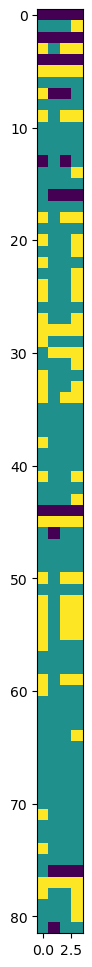

In [180]:
fig, ax = plt.subplots(figsize=(4, 12))

# Display the image with imshow() on the created figure
ax.imshow(nw_df.T)

# Show the plot
plt.show()

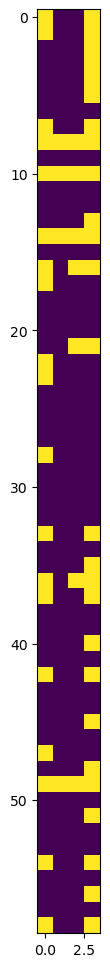

In [182]:
fig, ax = plt.subplots(figsize=(4, 12))

# Display the image with imshow() on the created figure
ax.imshow(se_df.T)

# Show the plot
plt.show()

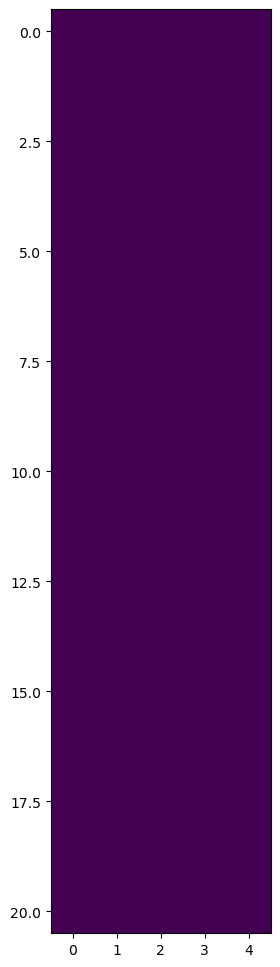

In [173]:
fig, ax = plt.subplots(figsize=(4, 12))

# Display the image with imshow() on the created figure
ax.imshow(sb_df.T)

# Show the plot
plt.show()

# Mitochondria (COX)

In [ ]:
#ge